In [10]:
import tensorflow

In [11]:
from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)

In [12]:
import numpy as np 
import pandas as pd 

In [13]:
df = pd.read_csv('cleaned_data/data_with_features.csv')
df = df.drop(df.columns[0], axis = 1)

In [14]:
steps = 20
batch_size = 256

In [15]:
user_length = df['EthicaID'].value_counts().reset_index().rename({'EthicaID':'count', 'index': 'EthicaID'}, axis = 1)
train_length = ((np.array(user_length['count'])//1.25) + (batch_size-(np.array(user_length['count'])//1.25)%batch_size)) + steps
rest = np.array(user_length['count']) - train_length
valid_length = (rest//2 - steps) + (batch_size-(((rest//2-steps)%batch_size))) + steps

rest_2 = np.array(user_length['count']) -  train_length - valid_length
test_length = (rest_2- steps - (rest_2 - steps)%batch_size) + steps

In [16]:
#user_length

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(11,7)})
sns.set_theme(style='white')

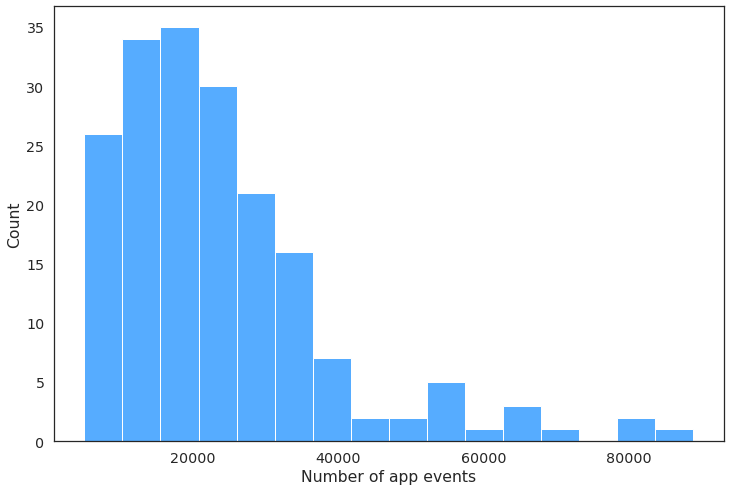

In [9]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set(style='white', font_scale=1.3)
hist = sns.histplot(user_length['count'].rename({'count': 'number of app events'}, axis = 1), color = 'dodgerblue')
hist.set_xlabel('Number of app events')
hist.figure.savefig("Distibution of the number of app records per user.png")

In [20]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length) >= 0).sum()

186

In [21]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length)).sum()

22888.0

In [22]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length)).sum() / np.array(user_length['count']).sum() 

0.005178376612416791

In [23]:
train_batches = []
train = df[0:0]

for user, length in zip(user_length['EthicaID'], train_length):
    length = int(length)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_train = df_single_user[:length]
    train = pd.concat([train.reset_index(drop= True), df_train.reset_index(drop = True)])
    train_batches.append(len(df_train))  
    
valid_batches = []
lst_valid = []

for user, length_train, length_valid in zip(user_length['EthicaID'], train_length, valid_length):
    length_train = int(length_train)
    length_valid = int(length_valid)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_valid = df_single_user[length_train: length_train+length_valid]
    lst_valid.append(df_valid)
    valid_batches.append(len(df_valid))
    
valid = pd.concat(lst_valid, axis = 0)
del lst_valid

test_batches = []
lst_test = []

for user, length_prev, length_test in zip(user_length['EthicaID'], train_length + valid_length, test_length):
    length_prev = int(length_prev)
    length_test = int(length_test)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_test = df_single_user[length_prev: length_prev+length_test]
    lst_test.append(df_test)
    test_batches.append(len(df_test))

test = pd.concat(lst_test, axis = 0)
del lst_test

In [24]:
batches = pd.DataFrame({'train': train_batches, 'validation': valid_batches, 'testing': test_batches}) 

In [25]:
batches

,train,validation,testing
0,71173,8965,8709
1,64517,8197,7685
2,64261,7941,7685
3,55557,6917,6661
4,54021,6661,6405
...,...,...,...
181,4613,773,261
182,4613,517,261
183,4357,517,261
184,4101,517,261


In [26]:
(user_length['count'] - (np.array(test_batches) + np.array(train_batches) + np.array(valid_batches)) >= 0).sum()

186

In [27]:
train.to_csv('cleaned_data/model_training_MQ&RQ1/training_data_each_user_batch256_steps5.csv')
test.to_csv('cleaned_data/model_training_MQ&RQ1/testing_data_each_user_batch256_steps5.csv')
valid.to_csv('cleaned_data/model_training_MQ&RQ1/validation_data_each_user_batch256_steps5.csv')
batches.to_csv('cleaned_data/model_training_MQ&RQ1/batch_size_each_user_batch256_steps5.csv')